In [9]:
import os

from operator import itemgetter

import numpy as np

In [10]:
true_text = """
Our epoch, the epoch of the bourgeoisie, possesses, however, this distinct feature: it has
simplified class antagonisms. Society as a whole is more and more splitting up into two great
hostile camps, into two great classes directly facing each other – Bourgeoisie and Proletariat.
From the serfs of the Middle Ages sprang the chartered burghers of the earliest towns. From these
burgesses the first elements of the bourgeoisie were developed.
The discovery of America, the rounding of the Cape, opened up fresh ground for the rising
bourgeoisie. The East-Indian and Chinese markets, the colonisation of America, trade with the
colonies, the increase in the means of exchange and in commodities generally, gave to commerce,
to navigation, to industry, an impulse never before known, and thereby, to the revolutionary
element in the tottering feudal society, a rapid development.
The feudal system of industry, in which industrial production was monopolised by closed guilds,
now no longer sufficed for the growing wants of the new markets. The manufacturing system
took its place. The guild-masters were pushed on one side by the manufacturing middle class;
division of labour between the different corporate guilds vanished in the face of division of labour
in each single workshop.
Meantime the markets kept ever growing, the demand ever rising. Even manufacturer no longer
sufficed. Thereupon, steam and machinery revolutionised industrial production. The place of
manufacture was taken by the giant, Modern Industry; the place of the industrial middle class by
industrial millionaires, the leaders of the whole industrial armies, the modern bourgeois.
Modern industry has established the world market, for which the discovery of America paved the
way. This market has given an immense development to commerce, to navigation, to
communication by land. This development has, in its turn, reacted on the extension of industry;
and in proportion as industry, commerce, navigation, railways extended, in the same proportion
the bourgeoisie developed, increased its capital, and pushed into the background every class
handed down from the Middle Ages.
We see, therefore, how the modern bourgeoisie is itself the product of a long course of
development, of a series of revolutions in the modes of production and of exchange.
Each step in the development of the bourgeoisie was accompanied by a corresponding political
advance of that class. An oppressed class under the sway of the feudal nobility, an armed and
self-governing association in the medieval commune*
: here independent urban republic (as in
Italy and Germany); there taxable “third estate” of the monarchy (as in France); afterwards, in the
period of manufacturing proper, serving either the semi-feudal or the absolute monarchy as a
counterpoise against the nobility, and, in fact, cornerstone of the great monarchies in general, the
bourgeoisie has at last, since the establishment of Modern Industry and of the world market,
conquered for itself, in the modern representative State, exclusive political sway. The executive
of the modern state is but a committee for managing the common affairs of the whole
bourgeoisie.
The bourgeoisie, historically, has played a most revolutionary part.
The bourgeoisie, wherever it has got the upper hand, has put an end to all feudal, patriarchal,
idyllic relations. It has pitilessly torn asunder the motley feudal ties that bound man to his
“natural superiors”, and has left remaining no other nexus between man and man than naked selfinterest, than callous “cash payment”.
"""

true_bytes = bytes(true_text, "utf-8")

In [11]:
filename_original   = "text_original.txt"
filename_compressed = "text_compressed.txt"

In [12]:
with open(filename_original, "wb") as file:
    file.write(true_bytes)

os.path.getsize(filename_original)

3591

In [13]:
ZERO = bin(0)
ONE  = bin(1)

class Leaf:
    def __init__(self, counts, value):
        self.counts = counts
        self.value  = value
    
    def __str__(self):
        return f"{self.counts} -> {self.value}"
    __repr__ = __str__

class Tree:
    def __init__(self, counts, left, right):
        assert isinstance(left, (Leaf, Tree)) and isinstance(right, (Leaf, Tree))

        self.counts = counts
        self.left   = left
        self.right  = right

    @property
    def max_depth(self):
        left  = 1 + self.left .max_depth if isinstance(self.left , Tree) else 1
        right = 1 + self.right.max_depth if isinstance(self.right, Tree) else 1
        return max(left, right)

    def compress(self, text):
        mapping = self.to_mapping()
        return b"".join(map(bytes, (eval(mapping[letter]) for letter in text)))

    def uncompress(self, bits, tree=None):
        if tree is None: tree = self
        for bit in bits:
            subtree = tree.right if bit else bit

    @staticmethod
    def build_from_text(text):
        occurrences = {char : text.count(char) for char in set(text)}
        return Tree.build_from_dict(occurrences)
    
    @staticmethod
    def build_from_dict(dct):
        leafs  = list(Leaf(v, b) for b, v in sorted(dct.items(), key=itemgetter(1)))
        print(sorted(dct.items(), key=itemgetter(1)))
        while len(leafs) > 1:
            l, r, *leafs = leafs
            c    = l.counts + r.counts
            node = Tree(c, l, r)
            i    = -1
            for j, l in enumerate(leafs):
                if l.counts > c:
                    i = j
                    break
            leafs = leafs[:i] + [node] + leafs[i:]
        return leafs[0]
    
    def to_mapping(self, full={}, path="0b"):
        left_path  = path + "0"
        right_path = path + "1"

        if isinstance(self.left , Tree): self.left .to_mapping(full,  left_path)
        else                           : full[self.left .value] =  left_path

        if isinstance(self.right, Tree): self.right.to_mapping(full, right_path)
        else                           : full[self.right.value] = right_path

        return full

    def __str__(self):
        return f"Counts: {self.counts}\nLeft: {self.left}\nRight: {self.right}"
    __repr__ = __str__

In [14]:
tree = Tree.build_from_text(true_text)

[('W', 1), ('*', 1), ('G', 1), ('O', 1), ('q', 1), ('–', 1), ('B', 1), ('P', 1), ('S', 2), (')', 2), ('C', 2), ('(', 2), (':', 2), ('E', 3), ('F', 3), ('”', 3), ('“', 3), ('-', 4), (';', 5), ('I', 5), ('M', 6), ('A', 6), ('x', 8), ('T', 12), ('k', 13), ('.', 23), ('w', 34), ('b', 36), ('v', 36), ('y', 42), ('\n', 43), (',', 57), ('g', 62), ('p', 63), ('f', 75), ('m', 84), ('u', 89), ('c', 90), ('l', 107), ('d', 126), ('h', 136), ('r', 187), ('s', 191), ('n', 212), ('a', 214), ('i', 216), ('o', 228), ('t', 236), ('e', 388), (' ', 513)]


In [15]:
bytes(eval(tree.to_mapping()["s"]))

b'\x00\x00\x00\x00\x00\x00\x00\x00'

In [ ]:
tree.compress(true_text)

In [1]:
import matplotlib.pyplot as plt

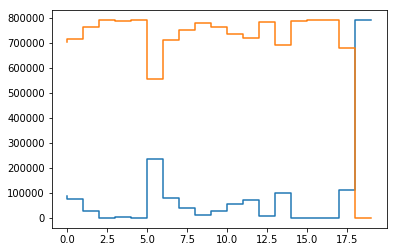

In [8]:
nm = [87414, 76676, 25871, 815, 1809, 575, 236412, 77701, 40012, 11953, 26391, 55803, 70878, 6013, 97800, 1100, 485, 613, 111306, 789654]
plt.plot(nm, drawstyle="steps")
nm = [max(nm)-n for n in nm]
plt.plot(nm, drawstyle="steps")
